# GoBike Data Analysis

## Project: Communicate Data Findings

<a id='intro'></a>
## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco
Bay area.

Questions that will be explored in this dataset are:
* What is the demographic of GoBikes userbase?
* What is the most popular station to pick up and/or return a bike?
* How long does the average trip take by gender?
* When are most trips taken in terms of time of day and day of the week?
* Does the above depend on if a user is a subscriber or customer?

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Clean

In [2]:
# Read CSV as Pandas DataFrame
bike = pd.read_csv('201902-fordgobike-tripdata.csv')
bike.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No


In [3]:
# Clean columns and drop extraneous columns
bike = bike[['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_id', 'user_type', 'member_birth_year', 'member_gender']]
print(bike.shape)
bike.head(1)

(183412, 11)


,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male


In [4]:
# Drop missing values
bike.dropna(inplace=True)

In [5]:
# Confirm
bike.isnull().sum()

duration_sec          0
start_time            0
end_time              0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
bike_id               0
user_type             0
member_birth_year     0
member_gender         0
dtype: int64

In [6]:
# Convert datatypes of two (2) columns
bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time = pd.to_datetime(bike.end_time)

In [7]:
# Confirm
bike.dtypes

duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_id             float64
start_station_name            object
end_station_id               float64
end_station_name              object
bike_id                        int64
user_type                     object
member_birth_year            float64
member_gender                 object
dtype: object

In [8]:
# Create new column `duration_mins` calculated from `duration_sec`
bike['duration_mins'] = bike['duration_sec']/60

In [9]:
# Convert datatype of new column to integer
bike.duration_mins = bike.duration_mins.astype(int)

In [10]:
# Delete original `duration_sec` column
bike.drop(['duration_sec'], axis=1, inplace=True)

In [11]:
# Confirm
bike.head(3)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_mins
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,869
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,1030
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,608


In [12]:
# Pull year from start_time
bike['year'] = bike['start_time'].dt.year

In [13]:
# Convert `member_birth_year` to age
bike['member_age'] = bike['year'] - bike['member_birth_year']

In [14]:
# Confirm
bike.head(3)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,duration_mins,year,member_age
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,869,2019,35.0
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,1030,2019,47.0
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,608,2019,30.0


<a id='exploratory'></a>
## Exploratory Data Analysis

### Univariate Exploration
Investigate distributions of individual variables.

#### What is the demographic of GoBikes userbase?
Males account for the majority of GoBike's total users. 74.6% of GoBike users are male. 23.3% of users are female. The remaining 2.1% are not identified. 

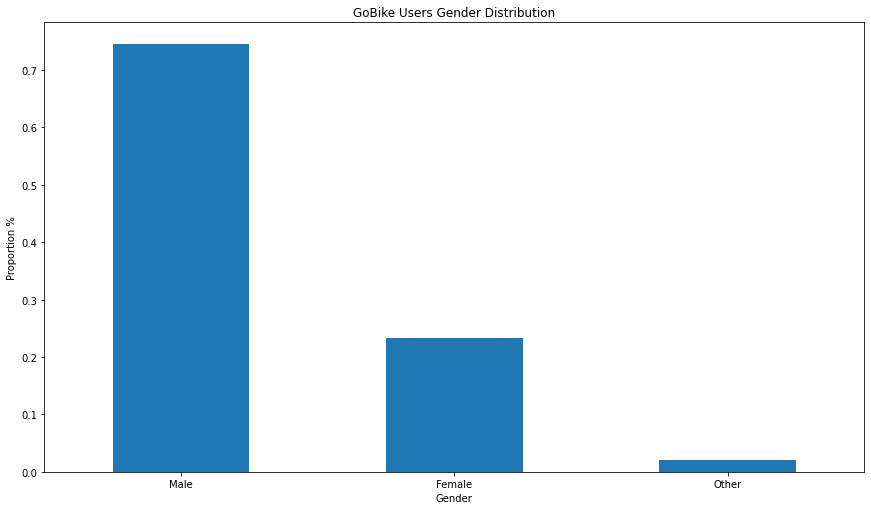

In [15]:
# Gender distribution
plt.figure(figsize=[14.70, 8.27])
bike['member_gender'].value_counts(normalize=True).plot.bar()
plt.xlabel('Gender')
plt.ylabel('Proportion %')
plt.xticks(rotation = 0, ha = 'center')
plt.title("GoBike Users Gender Distribution");

In [16]:
bike['member_gender'].value_counts(normalize=True) * 100

Male      74.591888
Female    23.323540
Other      2.084572
Name: member_gender, dtype: float64

In [17]:
# Create bins for age groups
bins = [18,35,55,75]
bike['age_group'] = pd.cut(bike.member_age, bins, labels=['18-35','36-55','56-75'])

Over 100,000, or 65.2%, of GoBike users are in the age group of 18-35.

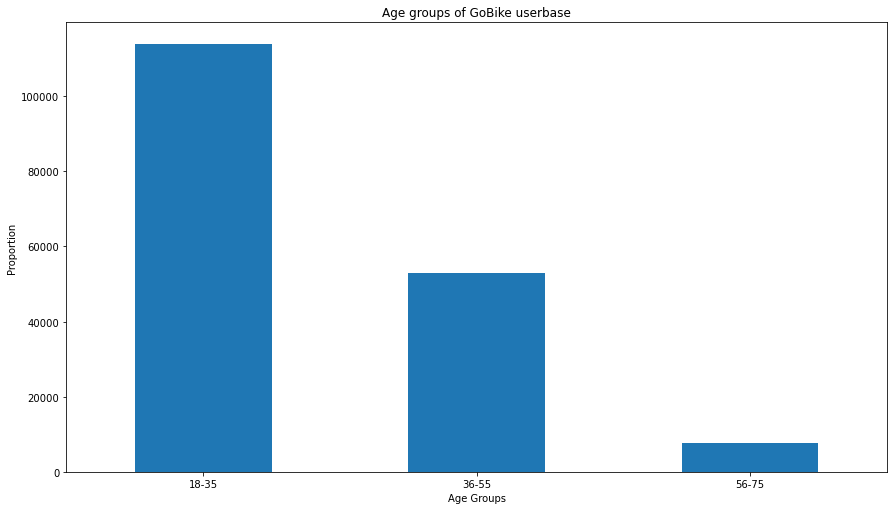

In [18]:
# Create bar chart
plt.figure(figsize=[14.70, 8.27])
bike['age_group'].value_counts().plot.bar()
plt.title('Age groups of GoBike userbase')
plt.xlabel('Age Groups')
plt.ylabel('Proportion')
plt.xticks(rotation = 0, ha = 'center');

In [19]:
bike['age_group'].value_counts(normalize=True) * 100

18-35    65.265810
36-55    30.369013
56-75     4.365177
Name: age_group, dtype: float64

#### What is the most popular station to pick up and/or return a bike?
The most popular station users begin GoBike trips is at "Market St. at 10th St.". 

#### Most Popular Station to Start Trip

In [20]:
# Check sources
bike.start_station_name.unique()

array(['Montgomery St BART Station (Market St at 2nd St)',
       'Market St at Dolores St', 'Grove St at Masonic Ave',
       'Frank H Ogawa Plaza', '4th St at Mission Bay Blvd S',
       'Palm St at Willow St', 'Washington St at Kearny St',
       'Post St at Kearny St', 'Jones St at Post St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       'Valencia St at 21st St', 'Bancroft Way at College Ave',
       'Howard St at Mary St', '22nd St at Dolores St',
       'Laguna St at Hayes St', '5th St at Folsom',
       'Telegraph Ave at 23rd St', 'Page St at Scott St',
       'Lake Merritt BART Station', 'West St at 40th St',
       'The Embarcadero at Sansome St', 'Folsom St at 9th St',
       'University Ave at Oxford St', 'MLK Jr Way at University Ave',
       'The Embarcadero at Bryant St', '17th St at Valencia St',
       'Valencia St at 16th St', 'Valencia St at 22nd St',
       'Franklin Square', 'San Pablo Ave at MLK Jr Way',
       '19th St at Mission 

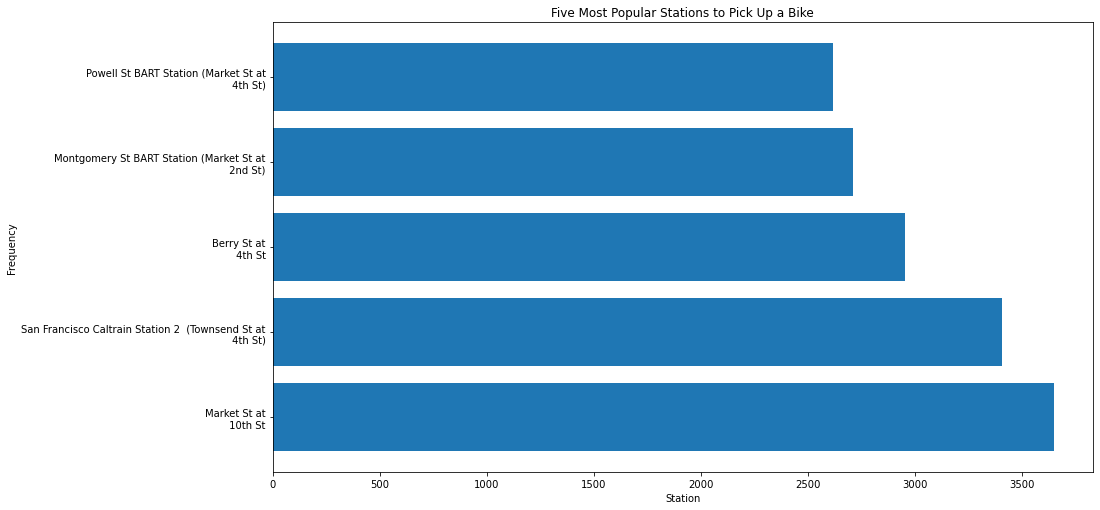

In [48]:
# Create bar chart
# plt.figure(figsize=[14.70, 8.27])
start = bike.start_station_name.value_counts().head(5).values
bars = bike.start_station_name.value_counts().head(5).index
# Replace 'at' with a line break
bars = [x.replace( " at", ' at\n') for x in bars]
y_pos = np.arange(len(bars))
plt.figure(figsize = (14.70, 8.27))
plt.barh(y_pos, start)
plt.title("Five Most Popular Stations to Pick Up a Bike")
plt.xlabel('Station')
plt.ylabel('Frequency')
plt.yticks(y_pos, bars)
plt.show();

In [22]:
bike['start_station_name'].value_counts(normalize=True).head(5) * 100

Market St at 10th St                                         2.085715
San Francisco Caltrain Station 2  (Townsend St at 4th St)    1.947963
Berry St at 4th St                                           1.687320
Montgomery St BART Station (Market St at 2nd St)             1.549568
Powell St BART Station (Market St at 4th St)                 1.497554
Name: start_station_name, dtype: float64

The most popular station users begin GoBike trips is at "Market St. at 10th St.".

#### Least Popular Station to Start Trip
The least popular station users begin GoBike trips is at "16th St. Depot". 

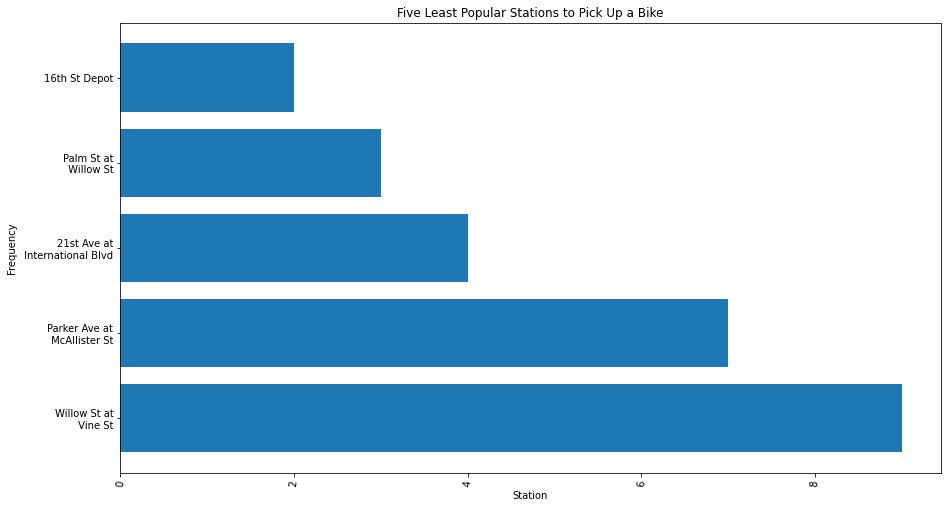

In [47]:
# Create bar chart
start = bike.start_station_name.value_counts().tail(5).values
bars = bike.start_station_name.value_counts().tail(5).index
# Replace 'at' with a line break
bars = [x.replace( " at", ' at\n') for x in bars]
y_pos = np.arange(len(bars))
plt.figure(figsize = (14.70, 8.27))
plt.barh(y_pos, start)
plt.title("Five Least Popular Stations to Pick Up a Bike")
plt.xlabel('Station')
plt.ylabel('Frequency')
plt.yticks(y_pos, bars)
plt.xticks(rotation = 85, ha = 'center')
plt.show();

#### Least Common Station to End Trip

In [24]:
# Check sources
bike.end_station_name.unique()

array(['Commercial St at Montgomery St',
       'Powell St BART Station (Market St at 4th St)',
       'Central Ave at Fell St', '10th Ave at E 15th St',
       'Broadway at Kearny', 'San Jose Diridon Station',
       'Valencia St at 21st St', 'Mission Playground',
       'San Francisco Public Library (Grove St at Hyde St)',
       'Bryant St at 2nd St', 'Channing Way at Shattuck Ave',
       '8th St at Ringold St', 'Broderick St at Oak St',
       'Potrero Ave and Mariposa St', 'Market St at Franklin St',
       'Telegraph Ave at 23rd St', '17th St at Dolores St',
       '6th Ave at E 12th St (Temporary Location)',
       'McAllister St at Baker St', 'Telegraph Ave at Carleton St',
       'Genoa St at 55th St', 'Grand Ave at Perkins St',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Folsom St at 9th St', 'Channing Way at San Pablo Ave',
       'Shattuck Ave at Hearst Ave', '2nd St at Townsend St',
       'Pierce St at Haight St',
       'Potrero del Sol Park (25

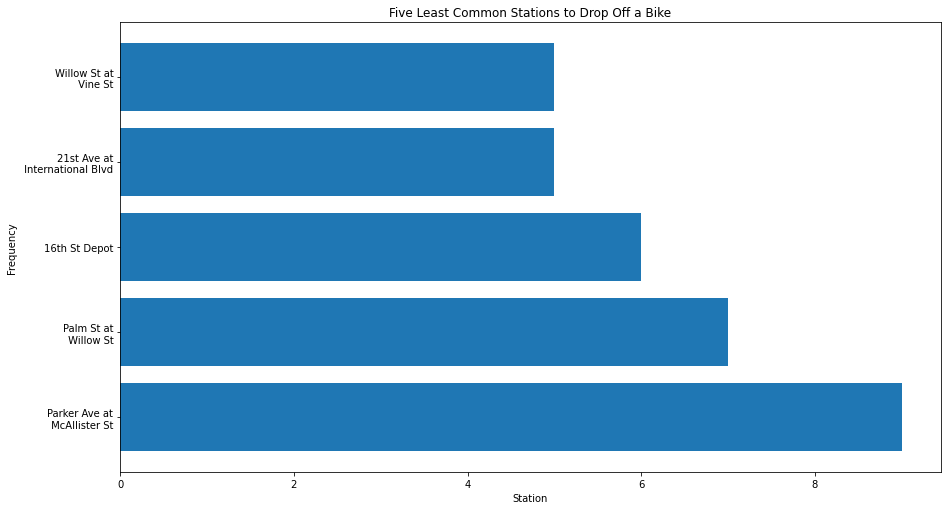

In [46]:
# Create bar chart
# plt.figure(figsize=[14.70, 8.27])
start = bike.end_station_name.value_counts().tail(5).values
bars = bike.end_station_name.value_counts().tail(5).index
# Replace 'at' with a line break
bars = [x.replace( " at", ' at\n') for x in bars]
y_pos = np.arange(len(bars))
plt.figure(figsize = (14.70, 8.27))
plt.barh(y_pos, start)
plt.title("Five Least Common Stations to Drop Off a Bike")
plt.xlabel('Station')
plt.ylabel('Frequency')
plt.yticks(y_pos, bars)
plt.show();

#### How long does the average trip take by gender?
The average trip duration for women is just over 12 minutes. The average trip duration for men is just over 10 minutes. Unfortunately users identifying as "Other" skews our results.

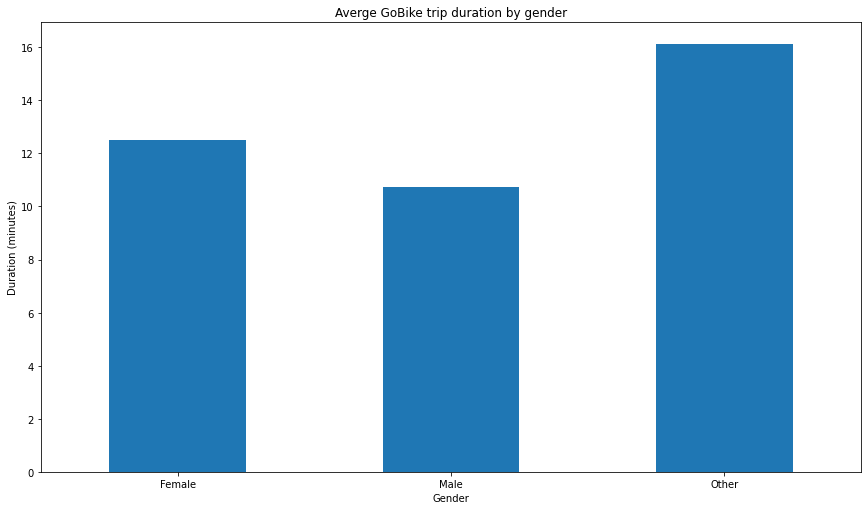

In [45]:
# plt.figure(figsize=[14.70, 8.27])
pd.DataFrame(bike.groupby('member_gender').mean()).reset_index().plot.bar(x='member_gender', y = 'duration_mins', figsize= (14.70, 8.27))
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)')
plt.title('Averge GoBike trip duration by gender')
plt.legend('',frameon=False)
plt.xticks(rotation = 0, ha = 'center');

#### When are most trips taken in terms of time of day and day of the week?
GoBike users start trips most frequently at 8am and 5pm. Based on this data we can surmise most GoBike users are commuting to/from work.

#### Most popular time of day for GoBike trips

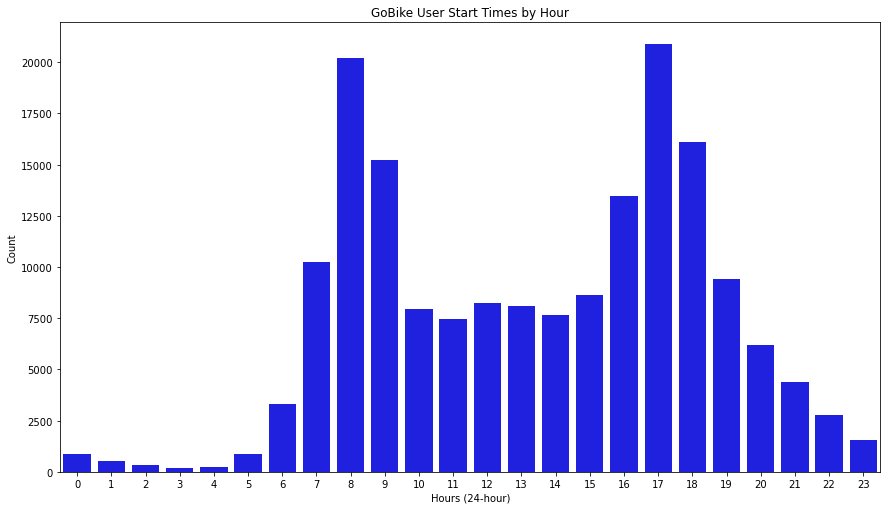

In [27]:
# Most popular time of day for trips
plt.figure(figsize=[14.70, 8.27])
start_hour = bike.start_time.dt.hour
# counts = start_hour.value_counts()
sns.countplot(x = start_hour, color = "blue")
plt.xlabel('Hours (24-hour)')
plt.ylabel('Count')
plt.title("GoBike User Start Times by Hour");

#### Most common day of the week for GoBike users
The most common day of the week for GoBike users to take a trip was Thursday. This confirms the conclusion that the bikes are predominately used during the week for commuting.

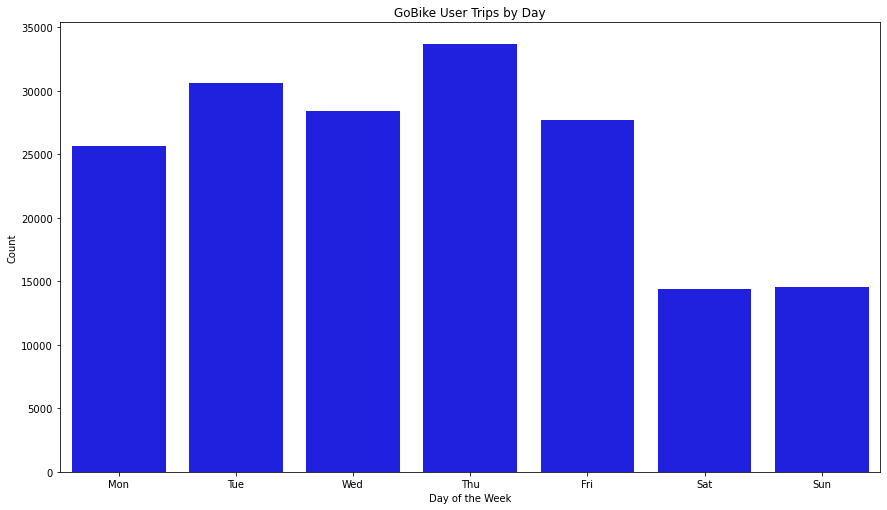

In [28]:
# Most common day of the week
plt.figure(figsize=[14.70, 8.27])
start_weekday = bike.start_time.dt.weekday
sns.countplot(x = start_weekday, color='blue')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'])
plt.title("GoBike User Trips by Day");

### Bivariate Exploration
Investigate relationships between pairs of variables in your data.

#### Do the above explorations depend on if a user is a subscriber or customer?
It appears as though the majority of subscribers to GoBike are male. 

#### Gender by user type

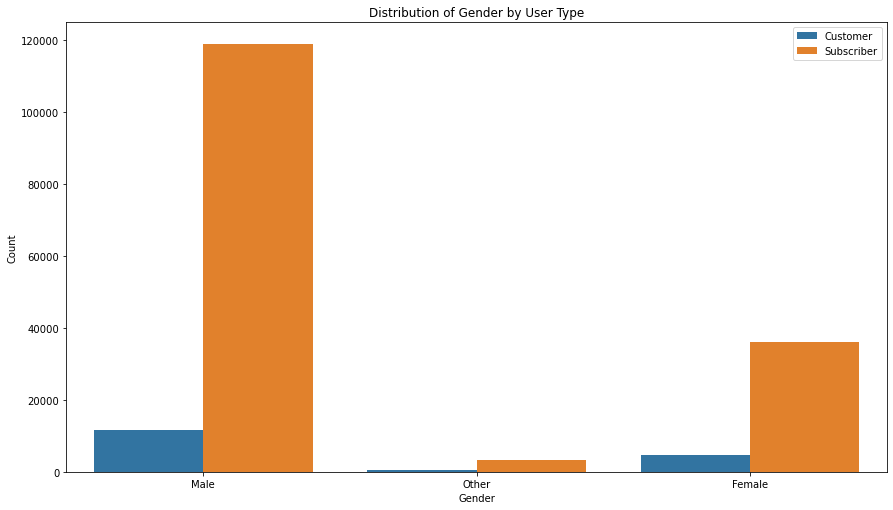

In [29]:
# Gender by user type
plt.figure(figsize=[14.70, 8.27])
sns.countplot(data = bike, x = 'member_gender', hue = 'user_type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.title("Distribution of Gender by User Type");

It appears as though the majority of subscribers to GoBike are male.

#### Age group by user type
The age group with the most amount of GoBike subscribers is between 18-35 years old.

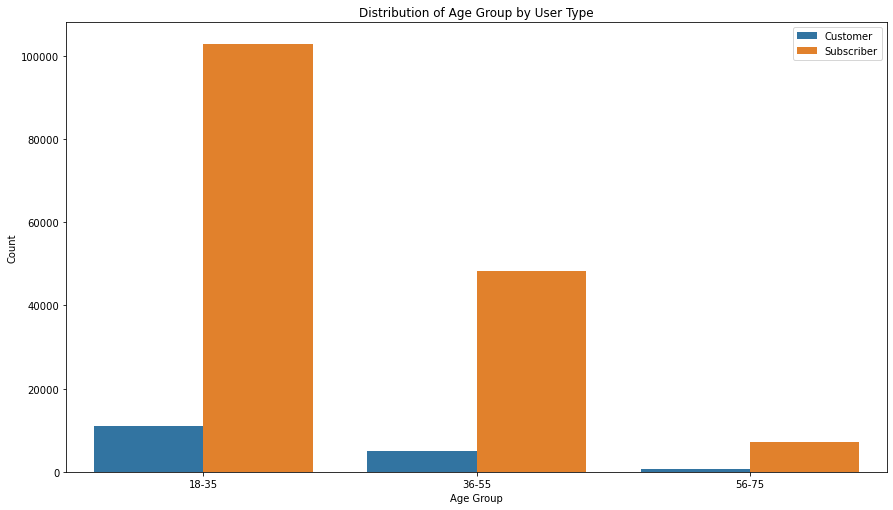

In [30]:
# Age group by user type
plt.figure(figsize=[14.70, 8.27])
sns.countplot(data = bike, x = 'age_group', hue = 'user_type')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend()
plt.title("Distribution of Age Group by User Type");

The age group with the most amount of GoBike subscribers is between 18-35 years old.

#### Trip duration by age group

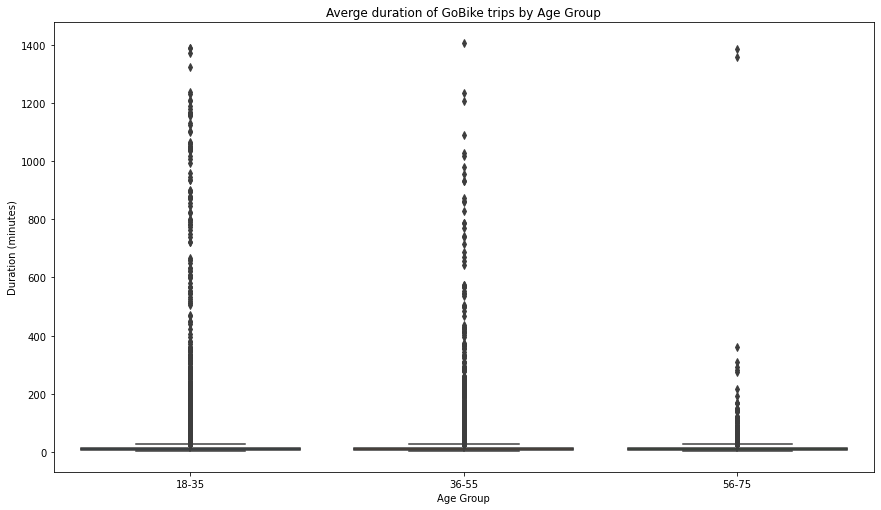

In [31]:
# Trip duration by age group
plt.figure(figsize=[14.70, 8.27])
sns.boxplot(data = bike, x = 'age_group', y = 'duration_mins')
plt.xlabel('Age Group')
plt.ylabel('Duration (minutes)')
plt.title("Averge duration of GoBike trips by Age Group");

In [32]:
bike.groupby("age_group").duration_mins.mean()

age_group
18-35    11.155680
36-55    11.281254
56-75    12.236097
Name: duration_mins, dtype: float64

We can see the trip duration for the older age group of 56-75 has the largest gap in time. Their trips are either very short or very long.

#### Trip duration by user type
The average duration of a customer trip is 21 minutes. This is higher than the subscriber average of 10 minutes. This could be due to more variability of customers who are out of immediate range of GoBike stations. Comparatively, it would seem that subscribers are either closer to GoBike stations and/or have a fixed routine that they use the bikes for.

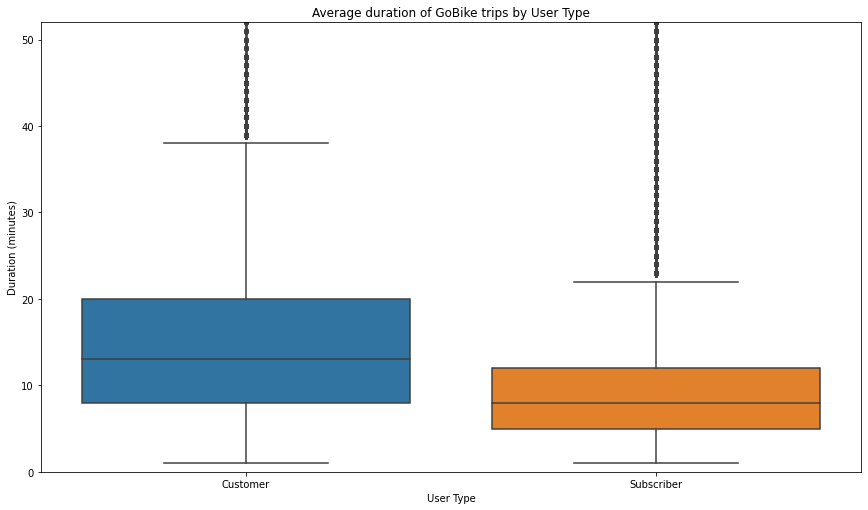

In [33]:
# Trip duration by user type
plt.figure(figsize=[14.70, 8.27])
sns.boxplot(data = bike, x = 'user_type',y = 'duration_mins')
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')
plt.title("Average duration of GoBike trips by User Type")
# Exclude the top 1 percent
plt.ylim(0, bike.duration_mins.quantile(0.99));

In [34]:
bike.groupby("user_type").duration_mins.mean()

user_type
Customer      21.350477
Subscriber    10.184132
Name: duration_mins, dtype: float64

#### Trip duration by gender
On average, women take longer trips than men by just more than 2 minutes. The average trip duration for women is just over 12 minutes. The average trip duration for men is just over 10 minutes.

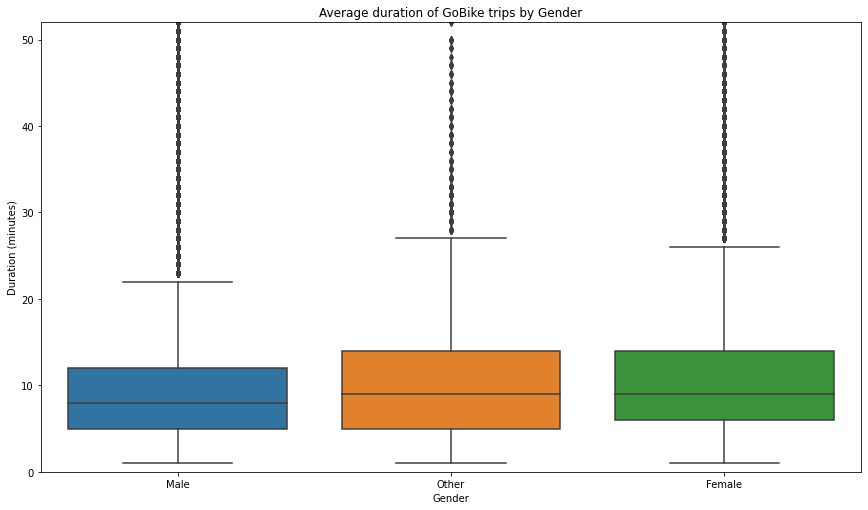

In [49]:
# Trip duration by gender
plt.figure(figsize=[14.70, 8.27])
sns.boxplot(data = bike, x = 'member_gender', y = 'duration_mins')
plt.xlabel('Gender')
plt.ylabel('Duration (minutes)')
plt.title("Average duration of GoBike trips by Gender")
# Exclude the top 1 percent
plt.ylim(0, bike.duration_mins.quantile(0.99));

In [36]:
bike.groupby("member_gender").duration_mins.mean()

member_gender
Female    12.487955
Male      10.714958
Other     16.134631
Name: duration_mins, dtype: float64

#### Most common time of day for trips by gender
As we saw in a previous analysis, both genders have trip start times that coincide with AM and PM commutes. For men, there appear to be small increases in usage throughout the middle of the day. Perhaps to run errands or grab lunch.

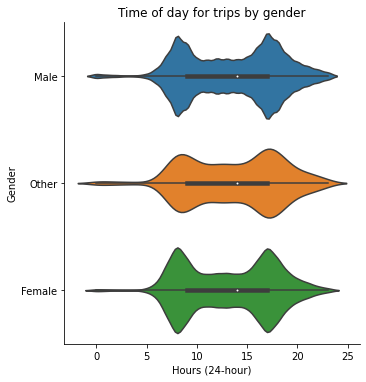

In [53]:
# Gender time of day for trips comparison
# plt.figure(figsize=[14.70, 8.27])
start_hour = bike.start_time.dt.hour
sns.catplot(x = start_hour, y = "member_gender", data = bike, kind = "violin")
plt.xlabel('Hours (24-hour)')
plt.ylabel('Gender')
plt.title("Time of day for trips by gender");

The relationships observed in the bivariate exploration were interesting. The basis of this analysis was to see the impact of the data when the relationship to user type was introduced. The largest discrepancies were regarding trip duration between customers and subscribers, as well as how age group or gender might impact trip duration. The data showed that trip duration is much longer with customers, not subscribers. In addition, the oldest age group of 56-75 take the longest trips averaging just over 12 minutes.

### Multivariate Exploration
Create plots of three or more variables to investigate your data even further.

While it was clear in earlier explorations that women take longer GoBike trips, it is interesting to see the age group that takes the longest for women is 56-75. For men, the age group that takes the longest average rides is 36-55. 

We learned that "other" is comprised of mostly 18-35 year olds who take the longest trips out of all other categories. This is interesting for several reasons, one of which being that this is contrary to any conclusions made that older riders take longer trips. As well, it is known that younger generations are more conscious about gender diversity and inclusion. Therefore, it is possible the absence of additional options is causing users to select "other".

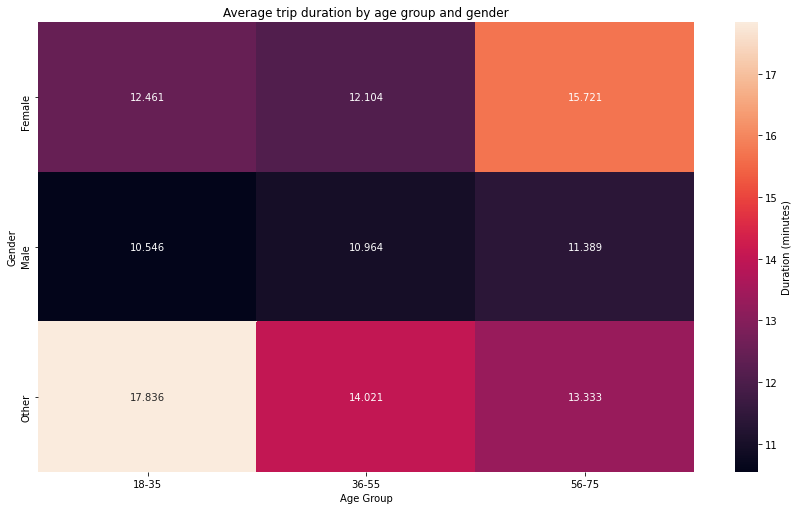

In [38]:
# Heat map of gender, age group by average duration (color palettes)
plt.figure(figsize=[14.70, 8.27])
cat_means = bike.groupby(['age_group', 'member_gender']).mean()['duration_mins']
cat_means = cat_means.reset_index(name = 'mean_duration_mins')
cat_means = cat_means.pivot(index = 'member_gender', columns = 'age_group',
                            values = 'mean_duration_mins')
sns.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Duration (minutes)'});

plt.xlabel('Age Group')
plt.ylabel('Gender')
plt.title("Average trip duration by age group and gender");

<a id='conclusions'></a>
## Conclusions
The insights gathered from the analysis present some opportunities for GoBike to capitalize on:
* Men are the majority of GoBike users so more resources can be allocated towards male subscribers or upselling male customers to become subscribers
* Ensure there is enough supply of GoBikes during peak times of 8AM and 5PM. Consider a small surcharge during these times or when supply is low
* Consider targeting the youngest age group of 18-35 "other" users who seem to take the longest trips. This could involve finding out what stations they start and end their trips at most frequently
* Remove "other" and include additional gender options to allow for more finite analysis in the future

The insights gathered from the analysis present some opportunities for GoBike to capitalize on:
* Men are the majority of GoBike users so more resources can be allocated towards male subscribers or upselling male customers to become subscribers
* Ensure there is enough supply of GoBikes during peak times of 8AM and 5PM. Consider a small surcharge during these times or when supply is low
* Consider targeting the youngest age group of 18-35 "other" users who seem to take the longest trips. This could involve finding out what stations they start and end their trips at most frequently
* Remove "other" and include additional gender options to allow for more finite analysis in the future

In [39]:
# command line to convert to slide with no code displayed
# jupyter nbconvert --to slides --TemplateExporter.exclude_input=True bike-sharing-explanatory-slides.ipynb